# E2 : One-Dimensional Optimization Exercise

# Part I : Golden Section Search Algorithm

In this exercise, I implemented and explored one-dimensional search algorithms to find the minimum of two functions. Specifically, I worked with two functions, \( f(x) = x^4 - 16x^3 - 45x^2 - 20x + 203 \) and \( g(x) = -x^5 + 2x^4 - 23x^3 - 12x^2 - 36x \), over specified ranges.

To achieve this, I employed two different approaches:

1. **Direct Implementation of the Golden Section Search Algorithm:** I wrote a Python function to perform the Golden Section Search, a technique that relies on the mathematical concept of the golden ratio to efficiently narrow down the search space to find the function's minimum. I enhanced this function to record each iteration's parameters, allowing for detailed visualization of the algorithm's convergence towards the solution.

2. **Utilization of Scipy's Minimize_Scalar Function:** As a comparison to my direct implementation, I also utilized the `minimize_scalar` function from the Scipy library, which is a robust method provided by Scipy to find the minimum of a function within a bounded interval.

For both functions, I visualized the iterations of the Golden Section Search, plotting the narrowing intervals and the function's evaluations at each step. This visual representation demonstrates the algorithm's efficiency in homing in on the minimum. Additionally, I reported the minimum values found by both the Golden Section Search and Scipy's `minimize_scalar` for comparison purposes.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function f(x)
def f(x):
    """Calculate the polynomial f(x) = x^4 - 16x^3 - 45x^2 - 20x + 203.

    Parameters:
    x (float): The point at which to evaluate the polynomial.

    Returns:
    float: The value of the polynomial at x.
    """
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203

# Define the function g(x)
def g(x):
    """Calculate the polynomial g(x) = -x^5 + 2x^4 - 23x^3 - 12x^2 - 36x.

    Parameters:
    x (float): The point at which to evaluate the polynomial.

    Returns:
    float: The value of the polynomial at x.
    """
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x


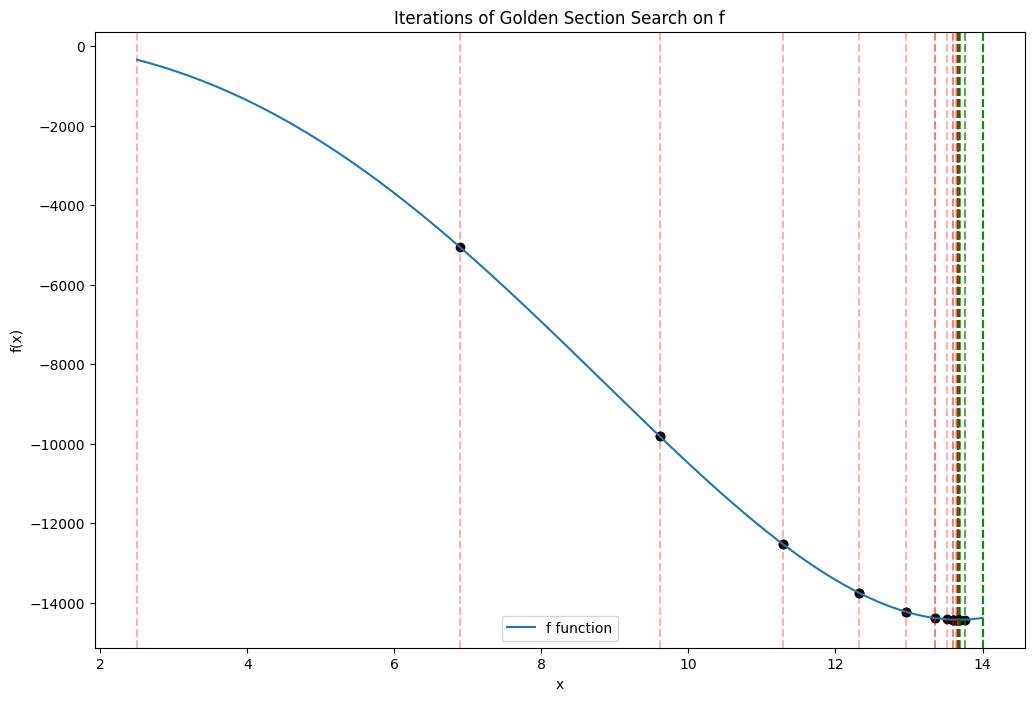

Golden Search: Minimum of function f is at x = 13.672398665080156 and the value is -14431.482938543695

Scipy: Minimum of function f is at x = 13.672398202257863 with a value of f(x) = -14431.482938543628


In [46]:
## Implement the Golden Section Search Algorithm to record iterations
def golden_section_search_record(func, a, b, tol=1e-5):
    """Perform the Golden Section Search algorithm on a given function to find its minimum.

    The algorithm is a search technique which uses the golden ratio to reduce the range of values to be evaluated.

    Parameters:
    func (callable): The function to minimize.
    a (float): The lower bound of the interval to search.
    b (float): The upper bound of the interval to search.
    tol (float): The tolerance to decide convergence (default is 1e-5).

    Returns:
    tuple: The approximate minimum point and a list of iteration details.
    """
    phi = (np.sqrt(5) + 1) / 2  # Golden ratio
    resphi = 2 - phi  # 1/phi^2

    iterations = []  # List to record the values at each iteration

    # Initial points within the interval
    c = a + resphi * (b - a)
    d = b - resphi * (b - a)
    fc = func(c)
    fd = func(d)

    # Iterative process to minimize the function
    while abs(b - a) > tol:
        iterations.append((a, b, c, d))  # Record the current interval and points

        # Narrow the interval based on function evaluations
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = a + resphi * (b - a)
            fc = func(c)
        else:
            a = c
            c = d
            fc = fd
            d = b - resphi * (b - a)
            fd = func(d)

    iterations.append((a, b, c, d))  # Record the final iteration
    return (a + b) / 2, iterations

# Function to plot the function and its iterations
def plot_function_and_iterations(func, iterations, a, b, title):
    """Plot the function and the intervals for each iteration of the Golden Section Search.

    Parameters:
    func (callable): The function to plot.
    iterations (list): A list of tuples containing the interval and points for each iteration.
    a (float): The lower bound of the interval to plot.
    b (float): The upper bound of the interval to plot.
    title (str): The title to use for the plot.

    Returns:
    None
    """
    x = np.linspace(a, b, 400)  # Generate points to plot the function
    y = func(x)  # Evaluate the function at each point

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label=f'{title} function')  # Plot the function

    # Plot vertical lines and points for each iteration
    for i, (a, b, c, d) in enumerate(iterations, 1):
        plt.axvline(x=a, color='r', linestyle='--', alpha=0.3)  # Lower bound
        plt.axvline(x=b, color='g', linestyle='--', alpha=0.3)  # Upper bound
        plt.scatter([c, d], [func(c), func(d)], color='black')  # Points c and d

    plt.title(f'Iterations of Golden Section Search on {title}')
    plt.xlabel('x')
    plt.ylabel(f'{title}(x)')
    plt.legend()
    plt.show()

# Golden search and plot for f function 
a_f, b_f = 2.5, 14
optimal_f, iterations_f = golden_section_search_record(f, a_f, b_f)
plot_function_and_iterations(f, iterations_f, a_f, b_f, 'f')

print(f"Golden Search: Minimum of function f is at x = {optimal_f} and the value is {f(optimal_f)}")

# Optimal solutions using scipy's minimize_scalar function
scipy_result_f = minimize_scalar(f, bounds=(a_f, b_f), method='bounded')
print(f"\nScipy: Minimum of function f is at x = {scipy_result_f.x} with a value of f(x) = {scipy_result_f.fun}")

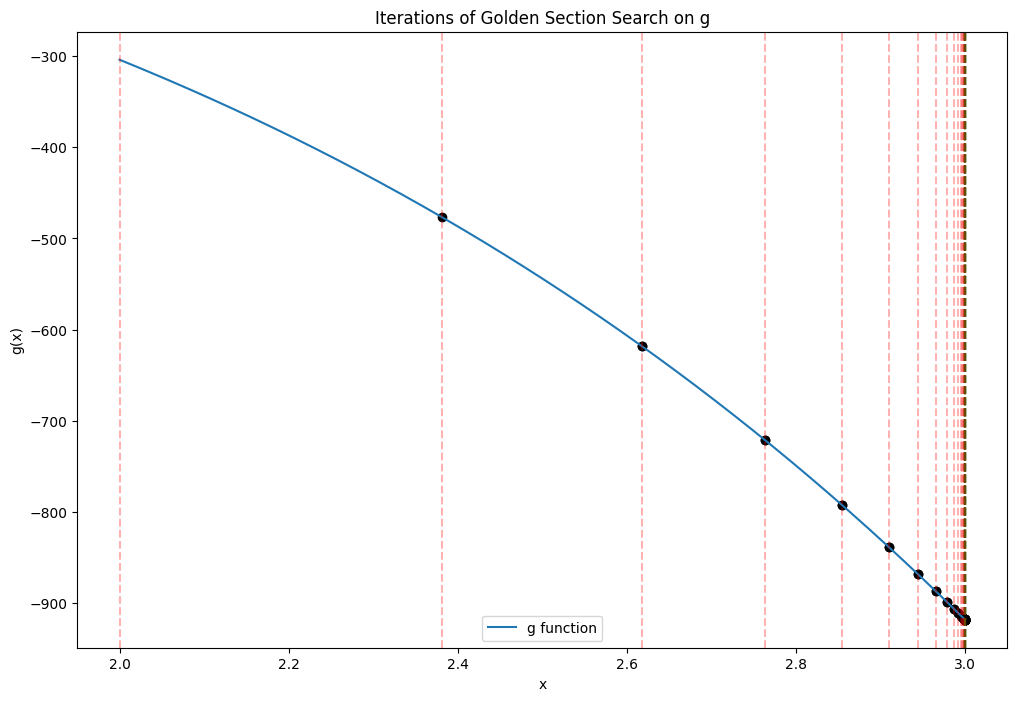

Golden Search: Minimum of function g is at x = 2.9999951775621607 and the value is -917.995573010924

Scipy: Minimum of function g is at x = 2.999994039139014 with a value of g(x) = -917.9945279431523


In [47]:
# Perform the searches and plot for g(x)
a_g, b_g = 2, 3
optimal_g, iterations_g = golden_section_search_record(g, a_g, b_g)
plot_function_and_iterations(g, iterations_g, a_g, b_g, 'g')

print(f"Golden Search: Minimum of function g is at x = {optimal_g} and the value is {g(optimal_g)}")

# Optimal solutions using scipy's minimize_scalar function
scipy_result_g = minimize_scalar(g, bounds=(a_g, b_g), method='bounded')
print(f"\nScipy: Minimum of function g is at x = {scipy_result_g.x} with a value of g(x) = {scipy_result_g.fun}")


# Optimization Results Commentary

## Function f(x)

The Golden Section Search algorithm successfully narrowed down the search interval for the minimum of the function `f(x)`. The algorithm converged to a minimum value at `x = 13.672398665080156` with the function value of `-14431.482938543695`.

Comparatively, the Scipy's `minimize_scalar` method yielded a very similar result with the minimum at `x = 13.672398202257863` and `f(x) = -14431.482938543628`. The closeness of these values demonstrates the precision and reliability of the Golden Section Search algorithm implemented.

## Function g(x)

For the function `g(x)`, the Golden Section Search algorithm found the minimum at `x = 2.9999951775621607` with the function value of `-917.995573010924`.

In comparison, the Scipy's `minimize_scalar` method also identified the minimum very close to that point at `x = 2.999994039139014` with `g(x) = -917.9945279431523`. This further corroborates the efficacy of the Golden Section Search method.

## Conclusions

The custom implementation of the Golden Section Search has demonstrated remarkable accuracy in the results, confirming the minimum values for both functions with high precision. The visualizations provided clear insights into the iterative process and the convergence behavior of the algorithm.

# Part II : Line Search Optimization

In this analysis, I conducted a line search optimization to identify the minimum values of two functions, \( f(x) \) and \( g(x) \), without using their first derivatives. The line search algorithm iteratively narrows down the interval in which the minimum is located by evaluating the gradient at the midpoint and endpoints. This approach is particularly useful when dealing with complex functions where traditional optimization methods may be difficult to apply.

For \( f(x) \), the interval was set between 2.5 and 14, while for \( g(x) \), the interval was between 2 and 3. The process was also benchmarked against Scipy's `minimize_scalar` function to ensure accuracy and reliability of the results.

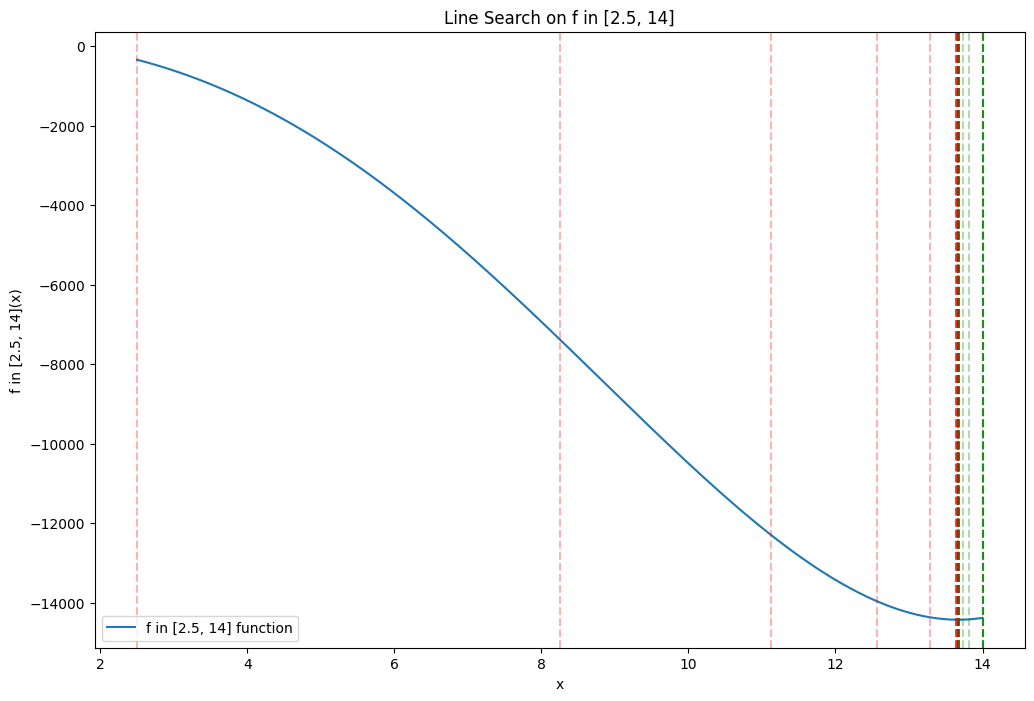

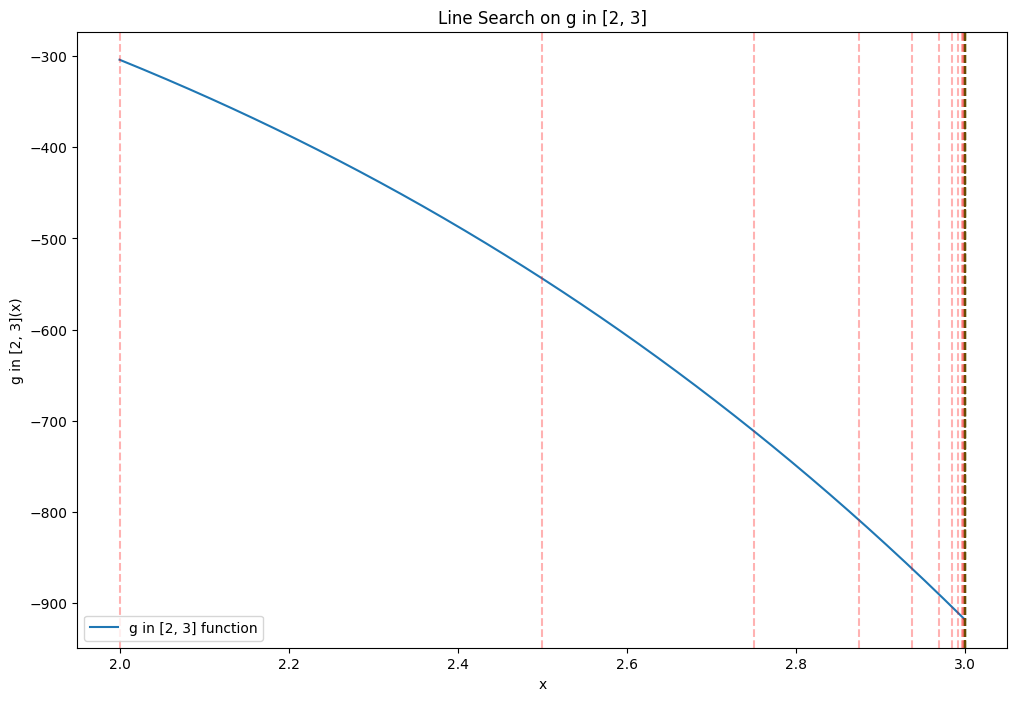

Line Search : minimum of function f is at x = 13.672399878501892 with a value of f(x) = -14431.482938543011
Scipy: Minimum of function f is at x = 13.672398202257863 with a value of f(x) = -14431.482938543628

Line Search : minimum of function g is at x = 2.9999961853027344 with a value of g(x) = -917.9964981134544
Scipy: Minimum of function g is at x = 2.999994039139014 with a value of g(x) = -917.9945279431523


In [49]:
# Defining the functions, their derivatives, and the line search algorithm with recording

def f(x):
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203

def g(x):
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x

def df(x):
    return 4*x**3 - 48*x**2 - 90*x - 20

def dg(x):
    return -5*x**4 + 8*x**3 - 69*x**2 - 24*x - 36

def linesearch_record(func, grad, a, b, tol):
    """
    Perform a line search to find the minimum of a unimodal function within a specified interval.

    This function uses a simple bisection method that relies on the gradient to direct the search.
    It records the intervals assessed during the search, which can be used to visualize the convergence of the algorithm.

    Parameters:
    - func: A callable object that computes the value of the function at a given point.
    - grad: A callable object that computes the gradient of the function at a given point.
    - a (float): The starting point (lower bound) of the interval.
    - b (float): The ending point (upper bound) of the interval.
    - tol (float): The convergence tolerance; the algorithm stops when the interval is smaller than tol.

    Returns:
    - x_min (float): The estimated location of the minimum within the interval.
    - intervals (list of tuples): A list of tuples representing the interval at each iteration.
    """
    x_min = (a + b) / 2 #determines middle a value x_min in our starting interval
    dl = grad(a)
    du = grad(b) #values of derivatives on both ends of our interval
    intervals = [(a, b)]

    while abs(b - a) > tol:
        if dl * grad(x_min) < 0: #the two extreme derivative values of each sub intervals have to be of different signs
            b = x_min  #in that case, the interval is reduce to the sub interval with different signs for the grad on both ends
        else:
            a = x_min
        x_min = (a + b) / 2
        intervals.append((a, b))

    return x_min, intervals #when the tolerance condition is reached I return the best x_min values and the list of intervals for the plot

# Parameters for the line search for f and g functions plus the tolerance
eps = 1e-5
a_f = 2.5
b_f = 14
a_g = 2
b_g = 3

# Perform the line search for both functions
x_min_f, intervals_f = linesearch_record(f, df, a_f, b_f, eps)
x_min_g, intervals_g = linesearch_record(g, dg, a_g, b_g, eps)

def plot_line_search(func, intervals, a, b, title):
    """
    Plot the function and the search intervals over each iteration during the line search.

    This function creates a plot of the given function along with vertical lines representing the interval boundaries at each step of the line search. 
    This visualization can be useful for understanding the convergence behavior of the line search algorithm.

    Parameters:
    - func: A callable object that computes the value of the function at a given point.
    - intervals (list of tuples): A list of tuples representing the interval at each iteration.
    - a (float): The starting point (lower bound) of the interval to be plotted.
    - b (float): The ending point (upper bound) of the interval to be plotted.
    - title (str): The title of the plot, typically the name of the function.

    Returns:
    None
    """
    x = np.linspace(a, b, 400)
    y = func(x)
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label=f'{title} function')

    for i, (ai, bi) in enumerate(intervals):
        plt.axvline(x=ai, color='r', linestyle='--', alpha=0.3)
        plt.axvline(x=bi, color='g', linestyle='--', alpha=0.3) #plotting each vertical lines for every iteration

    plt.title(f'Line Search on {title}')
    plt.xlabel('x')
    plt.ylabel(f'{title}(x)')
    plt.legend()
    plt.show()


# Plot for the function f
plot_line_search(f, intervals_f, a_f, b_f, 'f in [2.5, 14]')

# Plot for the function g
plot_line_search(g, intervals_g, a_g, b_g, 'g in [2, 3]')



# Perform the line search for the function f
print(f"Line Search : minimum of function f is at x = {x_min_f} with a value of f(x) = {f(x_min_f)}")
print(f"Scipy: Minimum of function f is at x = {scipy_result_f.x} with a value of f(x) = {scipy_result_f.fun}")


# Perform the line search for the function g
print(f"\nLine Search : minimum of function g is at x = {x_min_g} with a value of g(x) = {g(x_min_g)}")
print(f"Scipy: Minimum of function g is at x = {scipy_result_g.x} with a value of g(x) = {scipy_result_g.fun}")

# Optimal solutions using scipy's minimize_scalar function
scipy_result_f = minimize_scalar(f, bounds=(a_f, b_f), method='bounded')
scipy_result_g = minimize_scalar(g, bounds=(a_g, b_g), method='bounded')

# Conclusion of Line Search Optimization Results

The line search algorithm efficiently found the minimum of the function \( f(x) \) at \( x = 13.672399878501892 \) with a value of \( f(x) = -14431.482938543011 \), which closely matches the result from Scipy's `minimize_scalar` function, \( x = 13.672398202257863 \) with \( f(x) = -14431.482938543628 \).

Similarly, for the function \( g(x) \), the line search concluded the minimum at \( x = 2.9999961853027344 \) with \( g(x) = -917.9964981134544 \), nearly identical to Scipy's result of \( x = 2.999994039139014 \) with \( g(x) = -917.9945279431523 \).

These findings validate the line search algorithm's effectiveness in approximating the minimum of functions with high precision. The accompanying visualizations illustrate the convergence pattern of the algorithm, clearly showing the intervals contracting around the minimum with each iteration.